In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

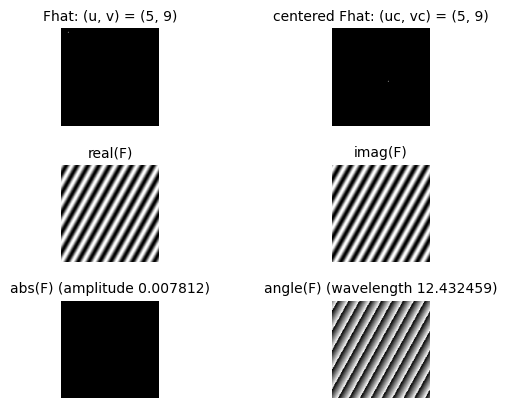

In [2]:
fftwave(5, 9)

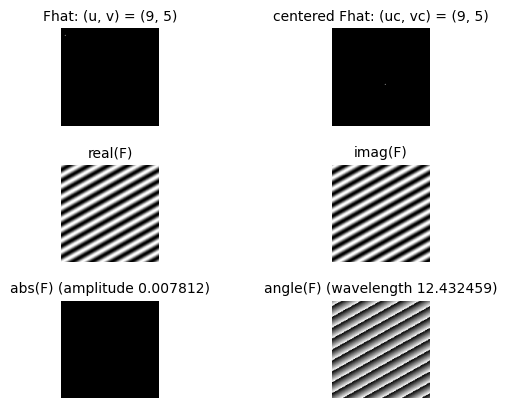

In [3]:
fftwave(9, 5)

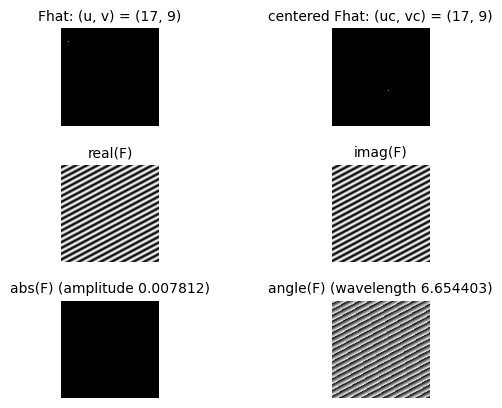

In [4]:
fftwave(17, 9)

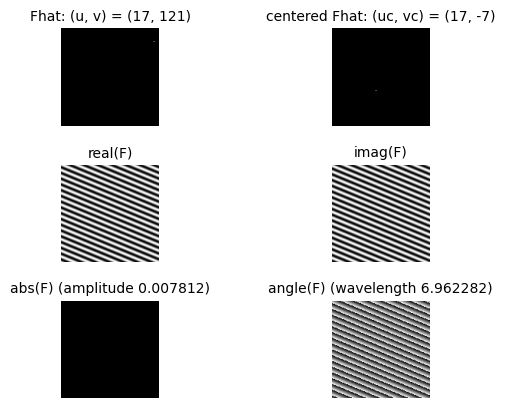

In [5]:
fftwave(17, 121)

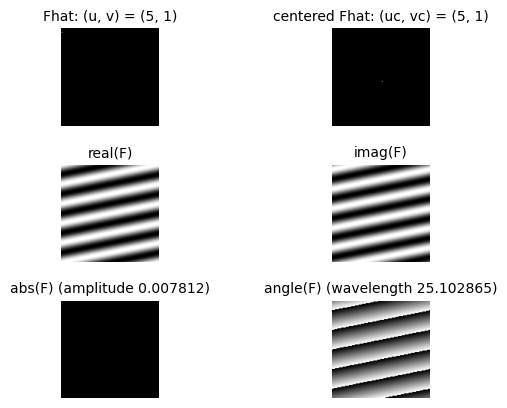

In [6]:
fftwave(5, 1)

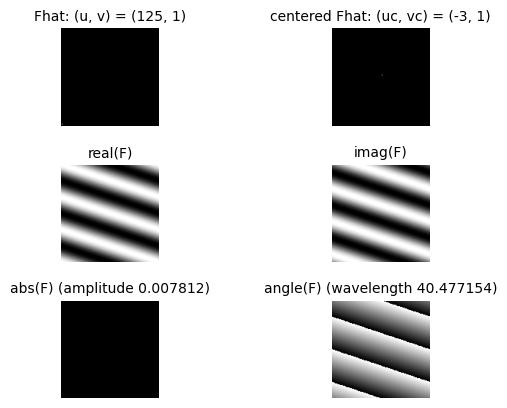

In [7]:
fftwave(125, 1)

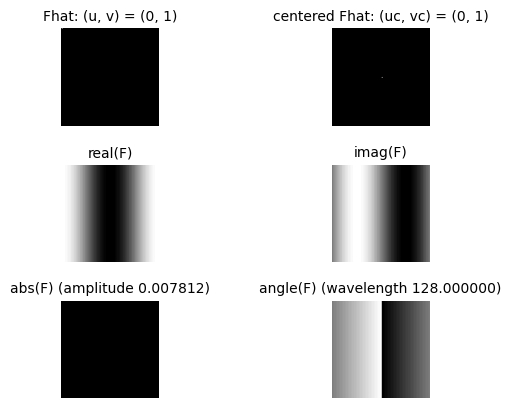

In [8]:
fftwave(0, 1)

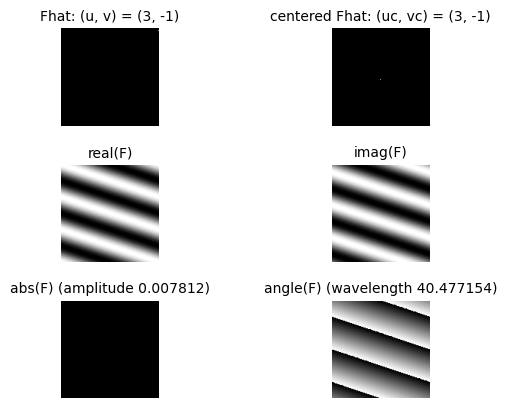

In [9]:
fftwave(3, -1)

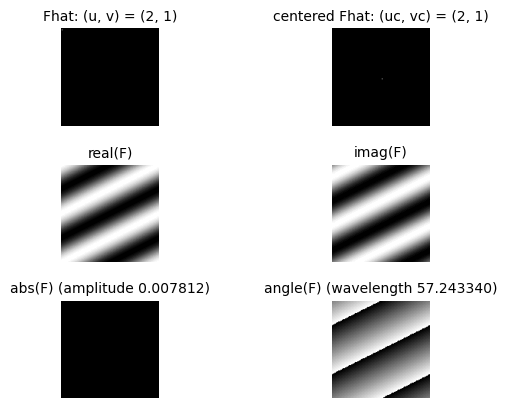

In [18]:
fftwave(2,1)

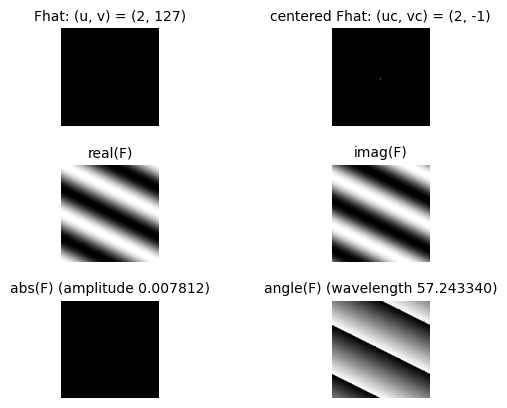

In [22]:
fftwave(2,127)

## Exercise 1.4

In [24]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

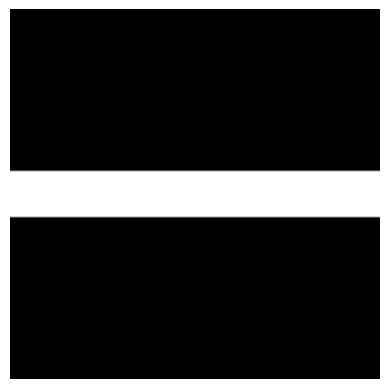

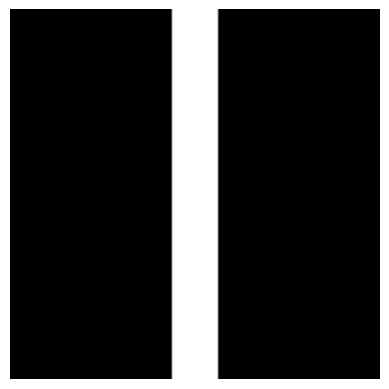

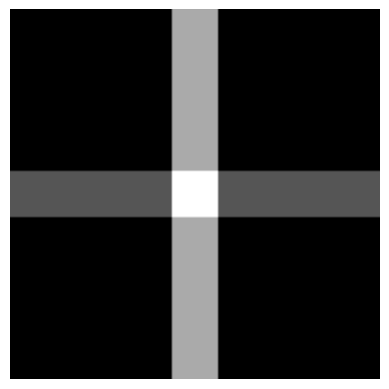

In [28]:
showgrey(F)
showgrey(G)
showgrey(H)

In [29]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

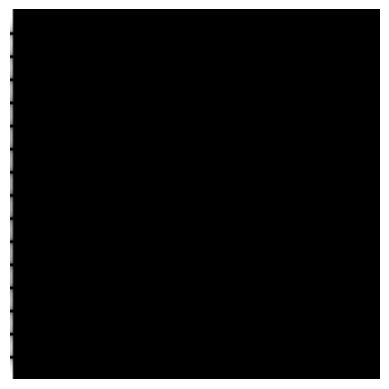

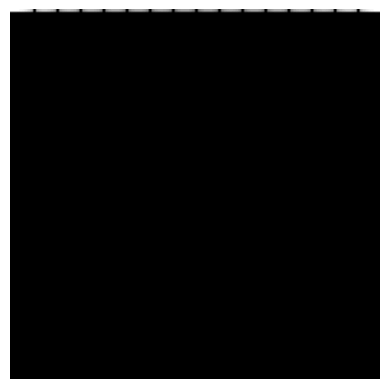

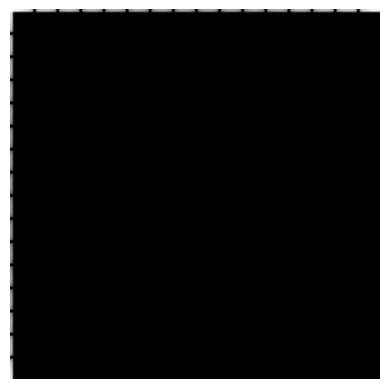

In [30]:
showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

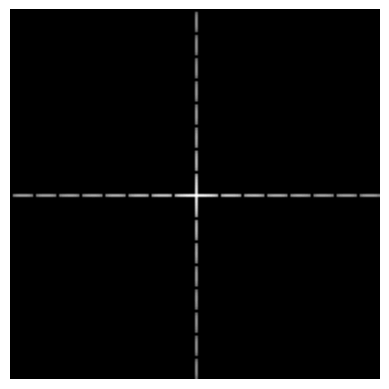

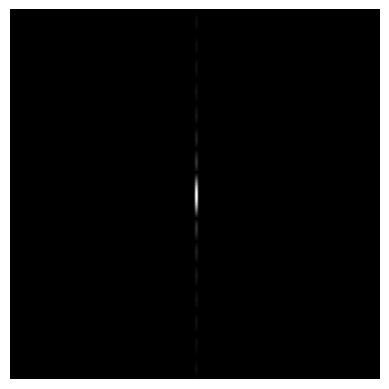

In [37]:
showgrey(np.log(1 + np.abs(fftshift(Hhat))))
showgrey(np.abs(fftshift(Fhat)))

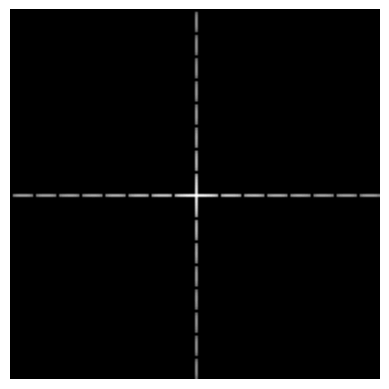

In [34]:
showfs(Hhat)

- fftshift is used so that the frequency domain is recentered around 0
- log is used so that lower coefficients (apparently exponentially decaying) are still visible.

## Exercise 1.5

In [40]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T

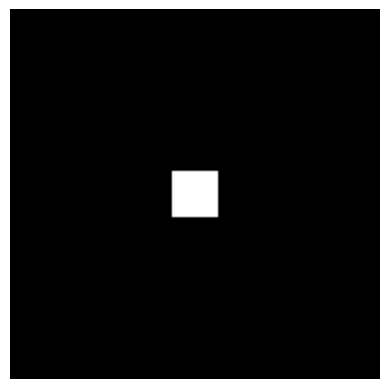

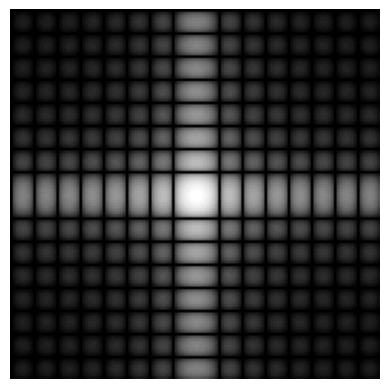

In [41]:
showgrey(F * G)
showfs(fft2(F * G))

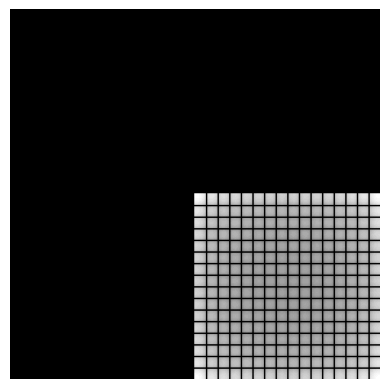

In [58]:
showfs((convolve2d((fft2(F)), (fft2(G)), 'full', 'fill')))

## Exercise 1.6 - Scaling

In [59]:
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
    np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)

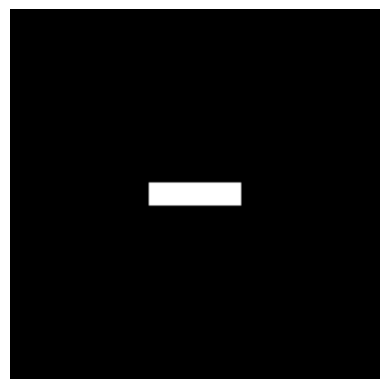

In [62]:
showgrey(F)

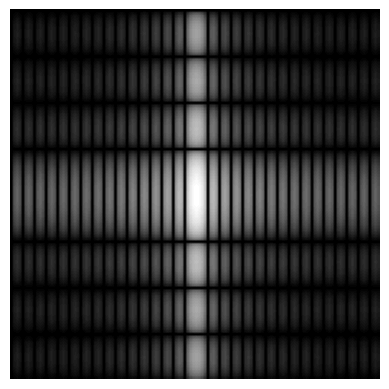

In [65]:
showfs(np.abs(fft2(F)))

## Exercise 1.7

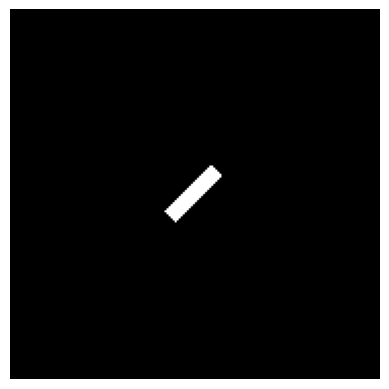

In [77]:
alpha = 45
G = rot(F, alpha)
showgrey(G)

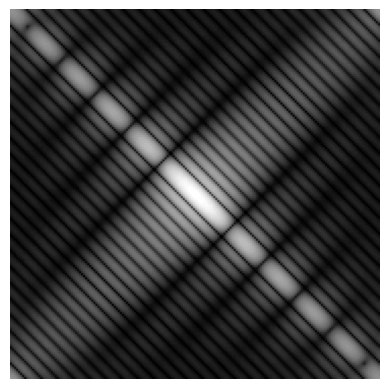

In [78]:
Ghat = fft2(G)
showfs(Ghat)

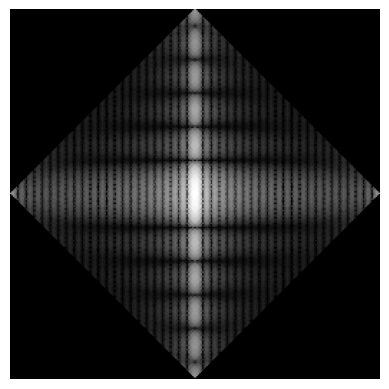

In [82]:
Hhat = rot(fftshift(Ghat), -alpha)
showgrey(np.log(1 + abs(Hhat)))

alpha =  30


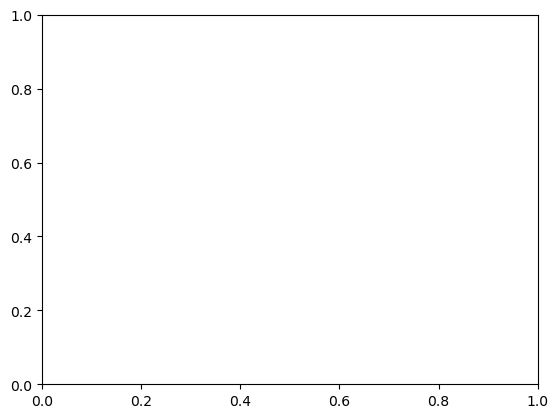

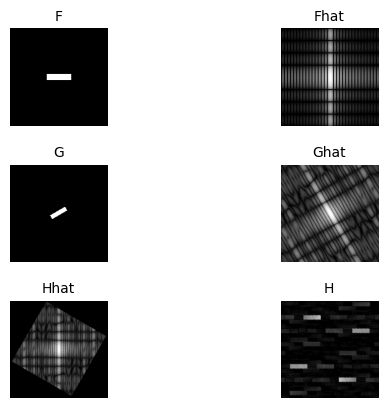

alpha =  45


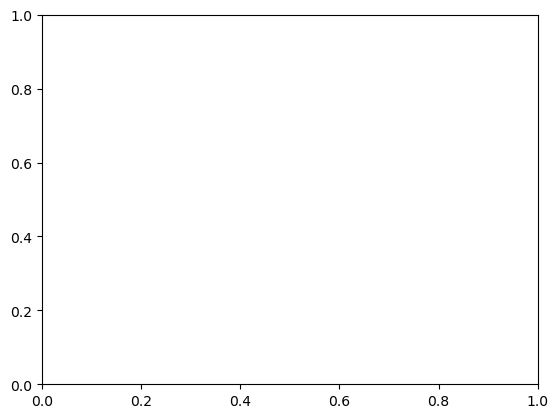

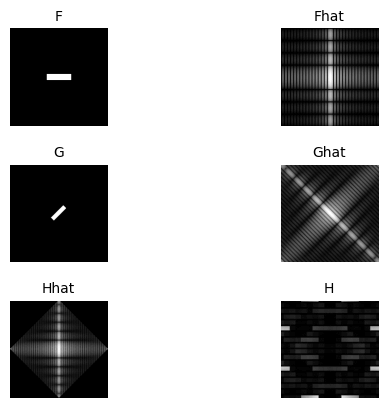

alpha =  60


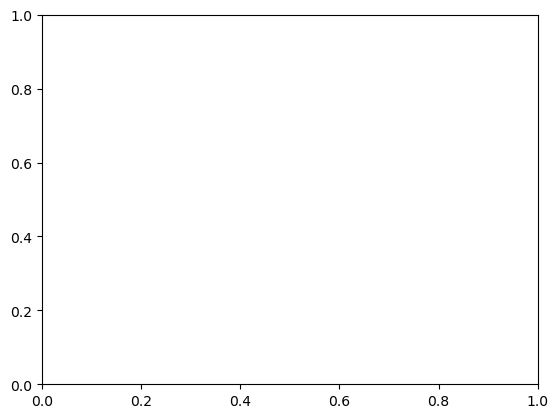

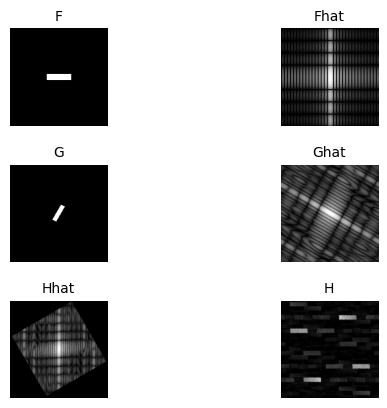

alpha =  90


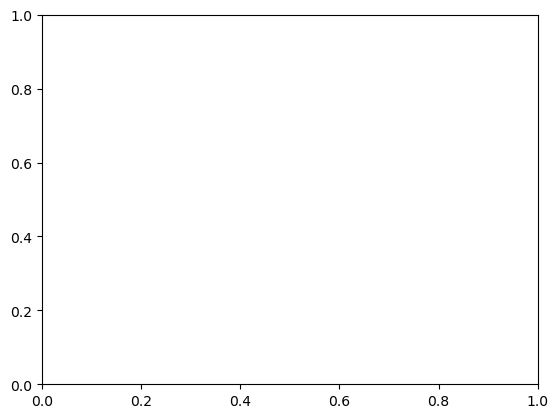

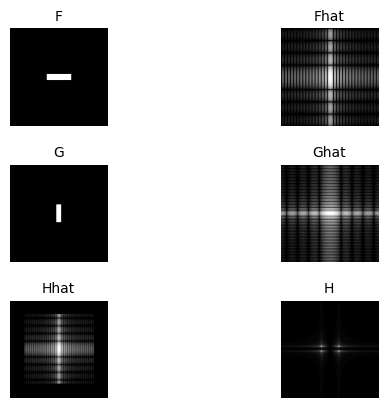

alpha =  135


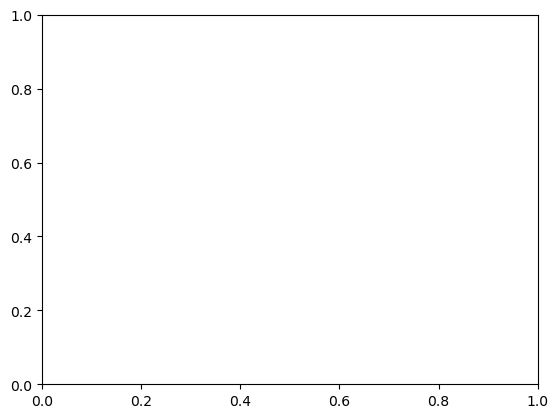

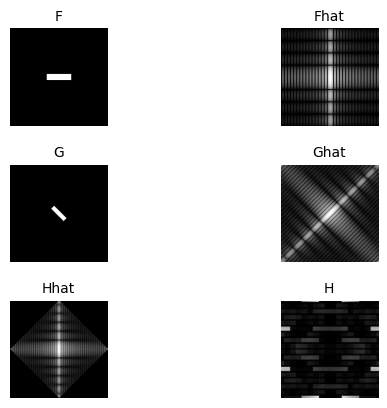

alpha =  180


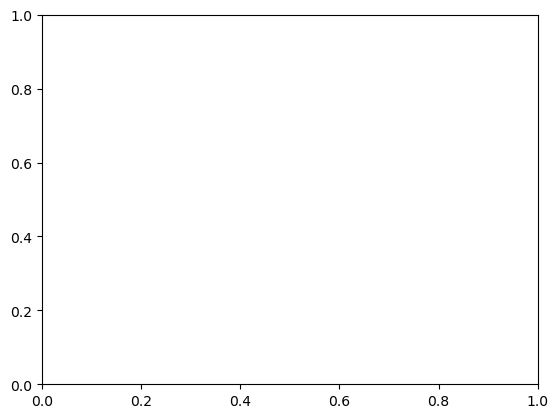

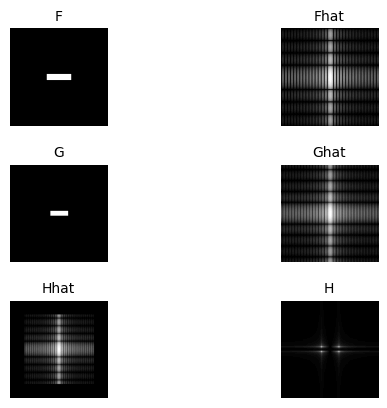

In [114]:
def fun(F, alpha):
    print("alpha = ", alpha)
    plt.cla()
    f = plt.figure()
    f.subplots_adjust(wspace=0.2, hspace=0.4)
    
    plt.rc('axes', titlesize=10)
    a1 = f.add_subplot(3, 2, 1)
    a1.set_title('F')
    showgrey(F, display=False)
    a2 = f.add_subplot(3, 2, 2)
    a2.set_title('Fhat')
    showfs(fft2(F), display=False)
    G = rot(F, alpha)
    a3 = f.add_subplot(3, 2, 3)
    a3.set_title('G')
    showgrey(G, display=False)
    a4 = f.add_subplot(3, 2, 4)
    a4.set_title('Ghat')
    Ghat = fft2(G)
    showfs(Ghat, display=False)
    Hhat = rot(fftshift(Ghat), -alpha)
    a5 = f.add_subplot(3, 2, 5)
    a5.set_title('Hhat')
    showgrey(np.log(1 + abs(Hhat)), display=False)
    H = ifft2(Hhat)
    a6 = f.add_subplot(3, 2, 6)
    a6.set_title('H')
    showgrey(np.abs(H), display)


for alpha in [30, 45, 60, 90, 135, 180]:
    fun(F, alpha)

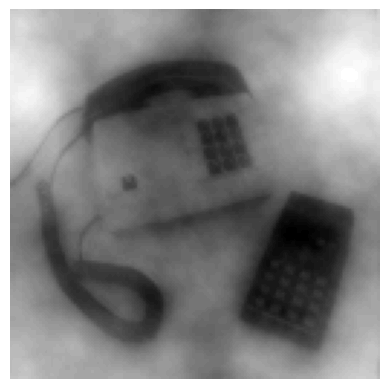

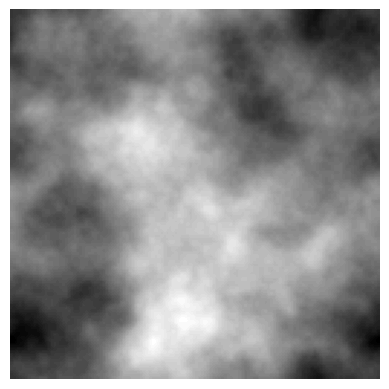

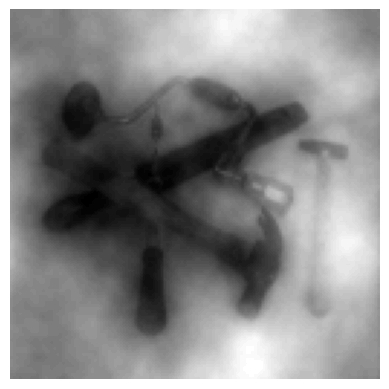

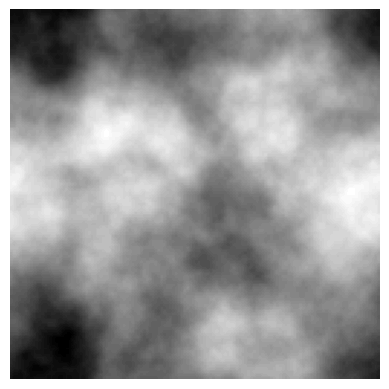

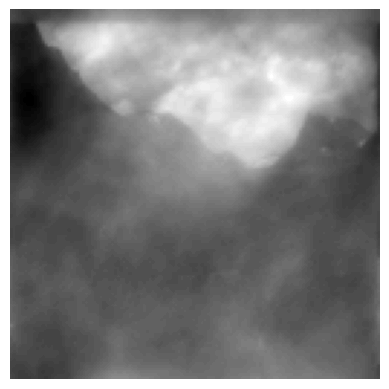

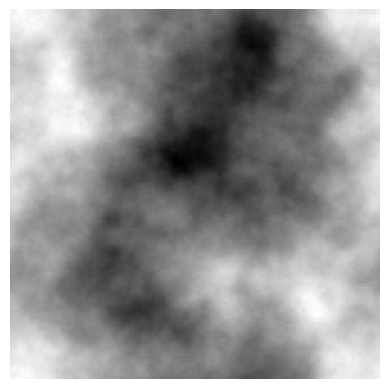

In [116]:
img_1 = np.load("Images-npy/phonecalc128.npy")
img_2 = np.load("Images-npy/few128.npy")
img_3 = np.load("Images-npy/nallo128.npy")

# Default second param a = 0.001
a = 0.001
pow_1 = pow2image(img_1, a)
pow_2 = pow2image(img_2, a)
pow_3 = pow2image(img_3, a)

plt.figure(1)
showgrey(pow_1, False)
plt.figure(2)
showgrey(randphaseimage(pow_1), False)
plt.show()

plt.figure(1)
showgrey(pow_2, False)
plt.figure(2)
showgrey(randphaseimage(pow_2), False)
plt.show()

plt.figure(1)
showgrey(pow_3, False)
plt.figure(2)
showgrey(randphaseimage(pow_3), False)
plt.show()